In [1]:
# Finds the secret number (e.g. 101001) hidden inside the box in 1 shot

from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [2]:
secretnumber = '101001'
input_indexes = range(len(secretnumber)) #=> [0,1,2,3,4,5]
input_size = len(secretnumber) #=> 6

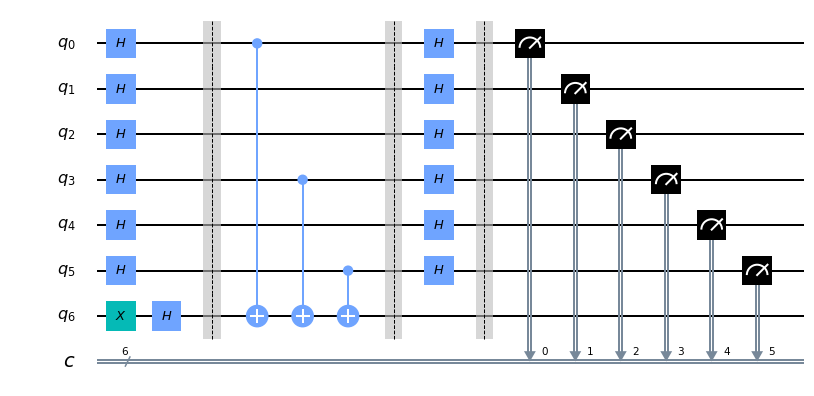

In [3]:
circuit = QuantumCircuit(input_size+1, input_size)

circuit.h(input_indexes)
circuit.x(input_size)
circuit.h(input_size)

circuit.barrier()

for ii, yesno in enumerate(reversed(secretnumber)):
    if  yesno == '1':
        circuit.cx(ii, input_size)

circuit.barrier()

circuit.h(input_indexes)

circuit.barrier()

circuit.measure(input_indexes, input_indexes)

circuit.draw(output='mpl')

In [4]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend= simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'101001': 1}
